# Homework 2: Introduction to SVMs

------------------------------------------------------
*Machine Learning, Master in Big Data Analytics, 2017-2018*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------


In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 
from sklearn.metrics import accuracy_score
sns.set()

In this homework, you will work with the following dataset

In [3]:
data=np.load('DataSet1.npz') 

X_train=data['arr_0']
Y_train=data['arr_1']
#X_test=data['arr_2']


Let's plot it to have an idea about how it looks:

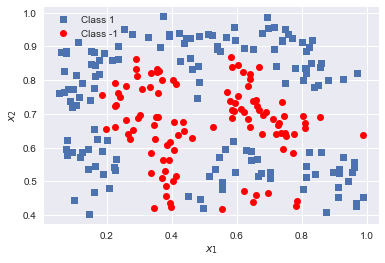

In [4]:
min1=np.min(X_train[:,0])
max1=np.max(X_train[:,0])
min2=np.min(X_train[:,1])
max2=np.max(X_train[:,1])

index=(Y_train==1).reshape(Y_train.shape[0],)
plt.plot(X_train[index,0],X_train[index,1],'s',label="Class 1")
index=(Y_train==0).reshape(Y_train.shape[0],)
plt.plot(X_train[index,0],X_train[index,1],'ro',label="Class -1")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.rcParams["figure.figsize"] = [8,8]

** Question 1 (1 point)** Hold out part of the training data to create a validation. For instance, take the 20% of the data points at random for validation.

In [8]:
data=np.load('DataSet1.npz') 
X_train=data['arr_0']
Y_train=data['arr_1']
X_test=data['arr_2']
X_train.shape

index = np.random.choice(X_train.shape[0], 50, replace=False) 
#indexY = np.random.choice(Y_train.shape[0], 50, replace=False) 

X_val=X_train[index]
Y_val=Y_train[index]

X_tr = np.delete(X_train, index,0)
Y_tr = np.delete(Y_train, index, 0)
Y_tr=np.ravel(Y_tr)



** Question 2 (4 points)** Train a SVM with a linear kernel. Plot the decision boundary and the $\pm 1$-distance to boundary contour levels. 

Use different values of $C$ and analyze the evolution of the number of support vectors as you vary this quantity. Explain the results!

Compute and plot the classification error rate for both training and validation sets as a function of $C$.

Do you think a linear kernel is adequate in this case?

In [232]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:            #If no figure handle is provided, it opens the current figure
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)    #30 points in the grid axis
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)                 # We create a grid with the x,y coordinates defined above
    
    # From the grid to a list of (x,y) values. 
    # Check Numpy help for ravel()
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T 
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    # In levels we provide a list of floating point numbers indicating 
    #the level curves to draw, in increasing order; e.g., to draw just the zero contour pass
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, marker='p')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [204]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)   # k(x1,x2) = x1^T x2
model.fit(X_tr, Y_tr)
model.n_support_

array([57, 59])

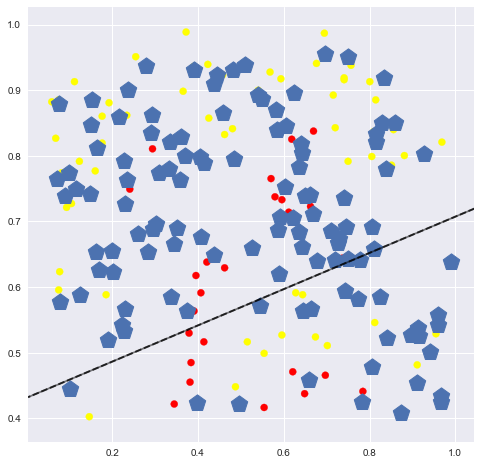

In [206]:
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=Y_tr, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.rcParams["figure.figsize"] = [10,10]

In [207]:
from sklearn.svm import SVC # "Support vector classifier"
model2 = SVC(kernel='linear', C=1e8)   # k(x1,x2) = x1^T x2
model2.fit(X_tr, Y_tr)
model2.n_support_

array([61, 62])

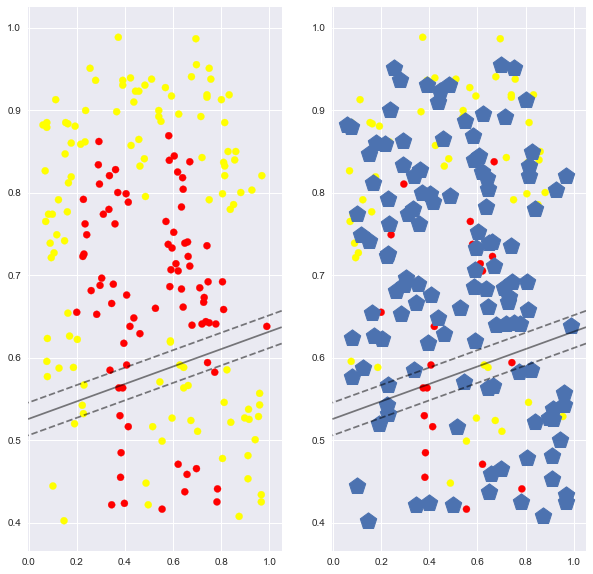

In [208]:
f, axes = plt.subplots(1, 2)
axes[0].scatter(X_tr[:, 0], X_tr[:, 1], c=Y_tr, s=50, cmap='autumn')
plot_svc_decision_function(model2,ax=axes[0], plot_support=False) 
axes[1].scatter(X_tr[:, 0], X_tr[:, 1], c=Y_tr, s=50, cmap='autumn')
plot_svc_decision_function(model2,ax=axes[1], plot_support=True) 

plt.rcParams["figure.figsize"] = [8,8]

In [175]:
def plotnumSV(x,y,cs):
    sv=np.zeros(len(cs))
    for i in range(len(cs)):
        model=SVC(kernel='linear',C=cs[i])
        model.fit(x,y)
        sv[i]=len(model.support_vectors_)
    return plt.plot(cs,sv)

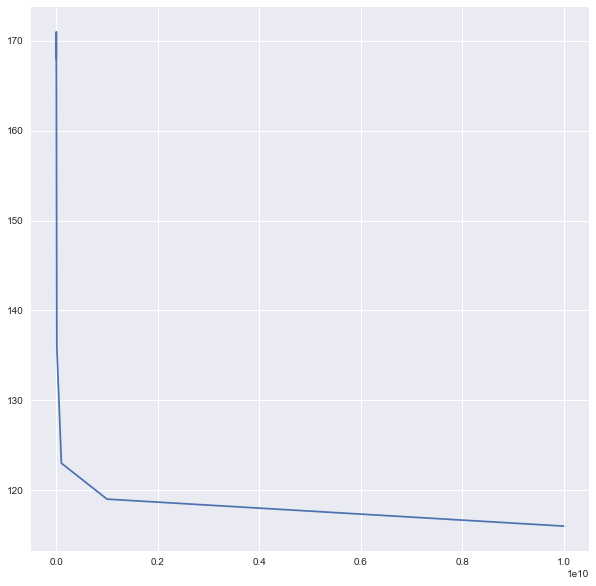

In [201]:
cs=[10,100,1e3,1e4,1e5,1e6,1e07,1e08,1e09,1e10]
plotnumSV(X_tr,Y_tr,cs)
plt.rcParams["figure.figsize"] = [5,5]

We can see that the number of support vectors decreases when increasing $C$, even though it remains quite high. Therefore we can deduce that the linear kernel is not appropriate for this dataset.

In [182]:
def plotAccuracy(x,y,xval,yval,cs):
    a=np.zeros([len(cs), 2])
    for i in range(len(cs)):
        model=SVC(kernel='linear',C=cs[i])
        model.fit(x,y)
        ptr=model.predict(x)
        pval=model.predict(xval)
        a[i,0]=accuracy_score(y,ptr)
        a[i,1]=accuracy_score(yval,pval)
    return plt.plot(cs,a)

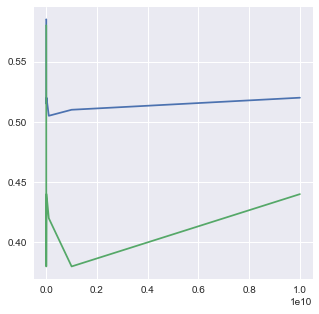

In [202]:
plotAccuracy(X_tr,Y_tr,X_val,Y_val,cs)
plt.rcParams["figure.figsize"] = [5,5]

From this plot we reach the same conclusion. The accuracy on the training set is higher than the one computed on the test set; however their values are near to the trivial threshold 0.5 for a binary classification problem. In particular the accuracy on th training set is higher than 0.5, but on the test set it does not even reach that level.

** Question 3 (5 points)** Train a SVM with a RBF kernel with bandwith $\gamma$. Plot the decision boundary and the $\pm 1$-distance to boundary contour levels. 

Use different values of $(C,\gamma)$ and analyze the evolution of the number of support vectors as you vary these quantities. For instance, fix $\gamma=1$ and vary $C$ and the other way around. Explain the results! Plotting the decision boundary and support vectors will help you to understand what's going on.

Note: check [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) to see how to vary $\gamma$.

For different values of $\gamma$, compute and plot the classification error rate for both training and validation sets as a function of $C$.


In [209]:
from sklearn.svm import SVC
nl = SVC(kernel='rbf',C=1e6, gamma=1).fit(X_tr, Y_tr)
len(nl.support_vectors_)

48

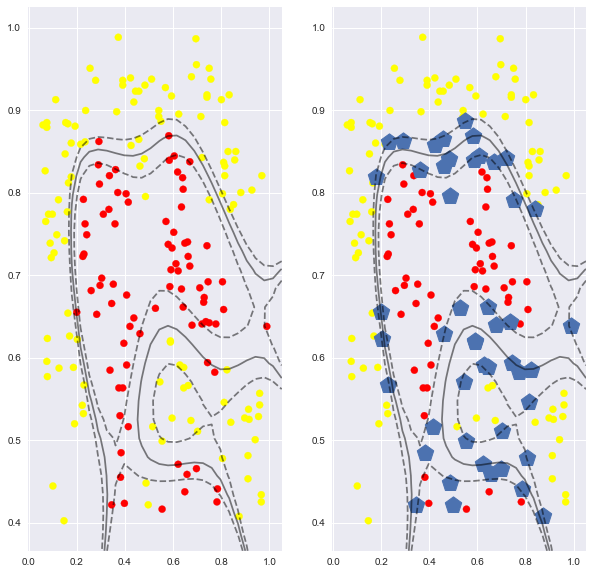

In [213]:
f, axes = plt.subplots(1, 2)
axes[0].scatter(X_tr[:, 0], X_tr[:, 1], c=Y_tr, s=50, cmap='autumn')
plot_svc_decision_function(nl,ax=axes[0], plot_support=False) 
axes[1].scatter(X_tr[:, 0], X_tr[:, 1], c=Y_tr, s=50, cmap='autumn')
plot_svc_decision_function(nl,ax=axes[1], plot_support=True) 

plt.rcParams["figure.figsize"] = [8,8]

From graphcal visualization of the results, we can see that we are improving the classification compared to SVM with linear kernel, even though the classification could be further improved by searching for the optimal parameters.

In [196]:
def computeSV(x,y,cs,g):
    f, axes = plt.subplots(len(cs), len(g))
    sv=np.zeros([len(cs),len(g)])
    for i in range(len(cs)):
            for j in range(len(g)):
                model=SVC(kernel='rbf',C=cs[i],gamma=g[j]).fit(x,y)
                axes[i,j].scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
                plot_svc_decision_function(model, ax=axes[i,j],plot_support=True)
                sv[i,j]=len(model.support_vectors_)
    return sv

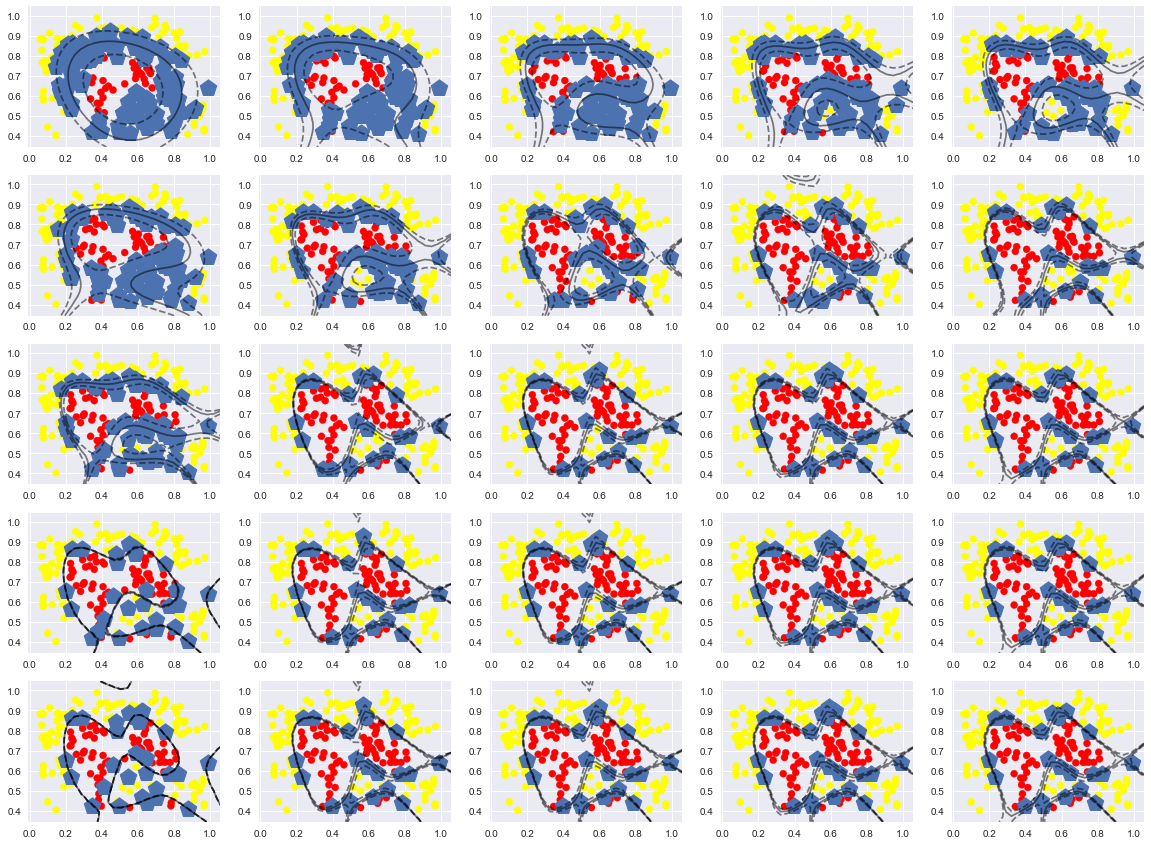

In [197]:
cs=[100,1e4,1e6,1e08,1e10]
g=[1,3,5,7,9]
computeSV(X_tr,Y_tr,cs,g)
plt.rcParams["figure.figsize"] = [20,15]

From the above plot we can see that the performances of the SVC is improving while increasing the values of $\gamma$ and $C$. In particular the margin get narrow as $C$ grows, while the shape of the boundaries curve becomes smoother with higher values of $\gamma$. 

According to the matrix it seems like the best models are with $C=1e^6$ and $\gamma=5$ or $C=1e^8$ and $\gamma=3$ beacuse they give the lowest number of support vectors. With higher values of the parameters the performances of SVC seem equal but the complexity of the model is higher. This can be seen in the plots too: in fact by increasing the parameters value the plots gets closer to each other.  <br>
Let's visualize them.

In [228]:
from sklearn.svm import SVC
nlOpt1 = SVC(kernel='rbf',C=1e6, gamma=5).fit(X_tr, Y_tr)
len(nlOpt1.support_vectors_)

20

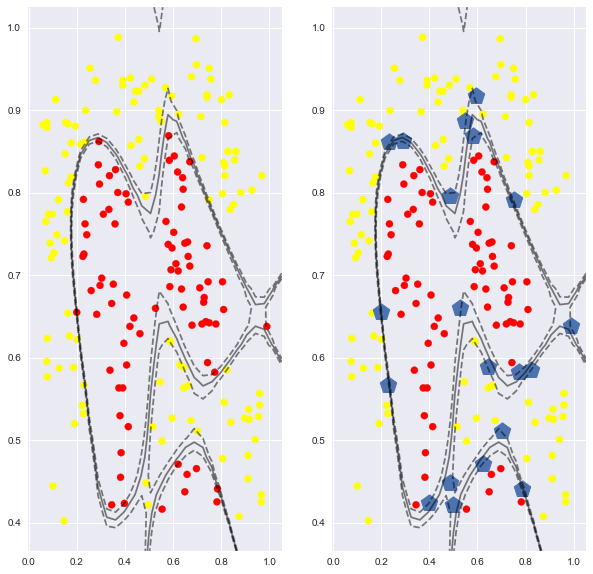

In [239]:
f, axes = plt.subplots(1, 2)
axes[0].scatter(X_tr[:, 0], X_tr[:, 1], c=Y_tr, s=50, cmap='autumn')
plot_svc_decision_function(nlOpt1,ax=axes[0], plot_support=False) 
axes[1].scatter(X_tr[:, 0], X_tr[:, 1], c=Y_tr, s=50, cmap='autumn')
plot_svc_decision_function(nlOpt1,ax=axes[1], plot_support=True) 

plt.rcParams["figure.figsize"] = [15,15]

In [167]:
from sklearn.metrics import accuracy_score
a1TR = accuracy_score(Y_tr, nlOpt1.predict(X_tr))
a1TE = accuracy_score(Y_val, nlOpt1.predict(X_val))
print("Accuracy on Training set is", a1TR)
print("Accuracy on Test set is", a1TE)

('Accuracy on Training set is', 1.0)
('Accuracy on Test set is', 0.95999999999999996)


In [162]:
from sklearn.svm import SVC
nlOpt2 = SVC(kernel='rbf',C=1e8, gamma=3).fit(X_tr, Y_tr)
len(nlOpt2.support_vectors_)

20

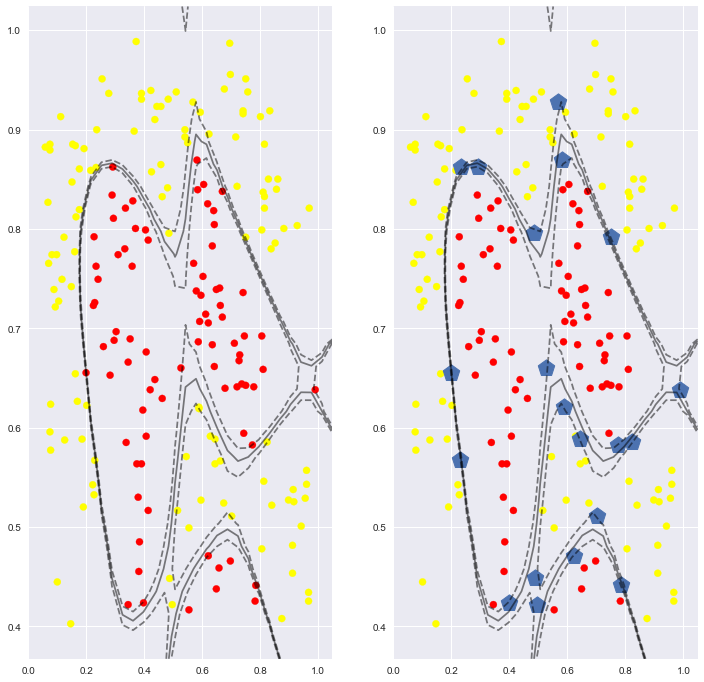

In [227]:
f, axes = plt.subplots(1, 2)
axes[0].scatter(X_tr[:, 0], X_tr[:, 1], c=Y_tr, s=50, cmap='autumn')
plot_svc_decision_function(nlOpt2,ax=axes[0], plot_support=False) 
axes[1].scatter(X_tr[:, 0], X_tr[:, 1], c=Y_tr, s=50, cmap='autumn')
plot_svc_decision_function(nlOpt2,ax=axes[1], plot_support=True) 

plt.rcParams["figure.figsize"] = [15,15]

In [174]:
from sklearn.metrics import accuracy_score
a2TR = accuracy_score(Y_tr, nlOpt2.predict(X_tr))
a2TE = accuracy_score(Y_val, nlOpt2.predict(X_val))
print("Accuracy on Training set is", a2TR)
print("Accuracy on Test set is", a2TE)

('Accuracy on Training set is', 1.0)
('Accuracy on Test set is', 0.95999999999999996)


From the accuracy values we can deduce that the two models have the same accuracy and both give good results on the test as well, reaching an accuracy of almost 0.96. <br>
Let's visualize the performances of the model __nlOpt2__ on the test set as well:

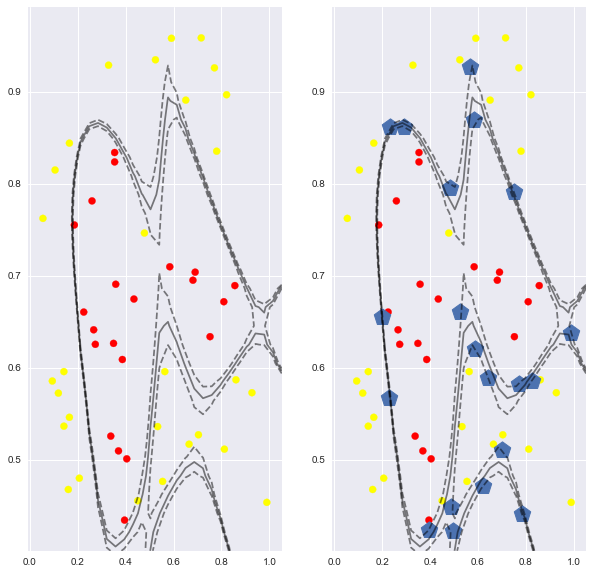

In [226]:
f, axes = plt.subplots(1, 2)
axes[0].scatter(X_val[:, 0], X_val[:, 1], c=np.ravel(Y_val), s=50, cmap='autumn')
plot_svc_decision_function(nlOpt2,ax=axes[0], plot_support=False) 
axes[1].scatter(X_val[:, 0], X_val[:, 1], c=np.ravel(Y_val), s=50, cmap='autumn')
plot_svc_decision_function(nlOpt2,ax=axes[1], plot_support=True) 

plt.rcParams["figure.figsize"] = [12,12]

In [185]:
def computeAccuracyC(x,y,xval,yval,cs):
    gs=(0,1,3,5,7)
    aTR=np.zeros([len(cs),len(gs)])
    aTE=np.zeros([len(cs),len(gs)])
    for j in range(1,len(gs)):
        for i in range(len(cs)):
            model=SVC(kernel='rbf',C=cs[i],gamma=j)
            model.fit(x,y)
            ptr=model.predict(x)
            pval=model.predict(xval)
            aTR[i,j]=accuracy_score(y,ptr)
            aTE[i,j]=accuracy_score(yval,pval)
    return aTR, aTE

In [186]:
cs=(100,1e4,1e6,1e08,1e10)
atr, ate = computeAccuracyC(X_tr,Y_tr,X_val,Y_val,cs)


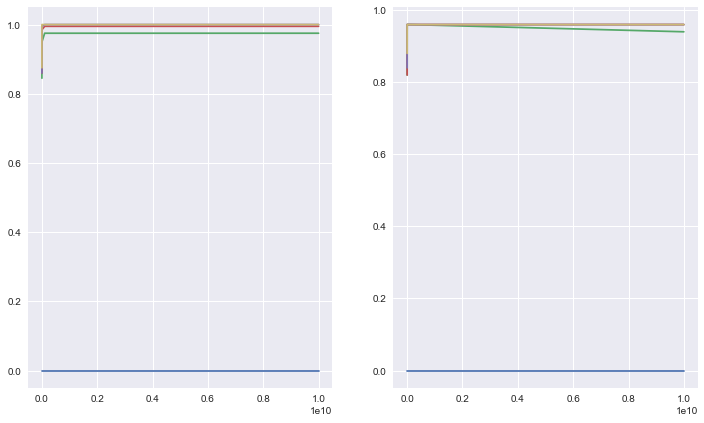

In [188]:
f, axes = plt.subplots(1, 2)
axes[0].plot(cs, atr)
axes[1].plot(cs, ate)
plt.rcParams["figure.figsize"] = [5,5]

From this plot we can appreciate high accuracy values, with no such a difference by increasing $\gamma$ and $C$. There is a line in both training and test set in 0 which represent the accuracy of the SVC with $\gamma=0$, which is totally not appropriate in this case.  